### Ethereum Crypto Currency Price Prediction


In this dataset, price is our dependent feature and the rest is our dependent features.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#https://www.kaggle.com/tanmay1710/ethereum-price-trend-historical-data
df = pd.read_csv('E:/personal project/bitcoin/Ethereum Historical Data.csv')
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Mar 10, 2016",11.75,11.20,11.85,11.07,0.00K,4.91%
1,"Mar 11, 2016",11.95,11.75,11.95,11.75,0.18K,1.70%
2,"Mar 12, 2016",12.92,11.95,13.45,11.95,0.83K,8.12%
3,"Mar 13, 2016",15.07,12.92,15.07,12.92,1.30K,16.64%
4,"Mar 14, 2016",12.50,15.07,15.07,11.40,92.18K,-17.05%


In [3]:
df.tail()

,Date,Price,Open,High,Low,Vol.,Change %
1885,"May 08, 2021","3,905.55","3,479.81","3,952.88","3,453.37",1.34M,12.19%
1886,"May 09, 2021","3,922.23","3,905.69","3,979.77","3,734.44",1.94M,0.43%
1887,"May 10, 2021","3,947.90","3,923.48","4,203.98","3,669.84",2.70M,0.65%
1888,"May 11, 2021","4,167.78","3,948.66","4,177.53","3,781.86",1.27M,5.57%
1889,"May 12, 2021","4,241.19","4,173.61","4,366.10","4,151.39",2.20M,1.76%


In [4]:
df['Vol.'].head()

0     0.00K
1     0.18K
2     0.83K
3     1.30K
4    92.18K
Name: Vol., dtype: object

### Data Cleaning

In [5]:
## AS volume column of dataset is not cleaned
for i in df['Vol.'].index:
    if (df['Vol.'][i] == '-'):
        df['Vol.'][i] = np.nan

In [6]:
### to check for null values
df.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        8
Change %    0
dtype: int64

In [7]:
### To check data types
df.dtypes

Date        object
Price       object
Open        object
High        object
Low         object
Vol.        object
Change %    object
dtype: object

In [8]:
### For converting the Vol. column values to numerical values
df['Vol.']= df['Vol.'].replace({'K':'*1e3', 'M': '*1e6'}, regex = True)

df['Vol.'].head()

0     0.00*1e3
1     0.18*1e3
2     0.83*1e3
3     1.30*1e3
4    92.18*1e3
Name: Vol., dtype: object

In [9]:
## Loop to evaluate every expression
for i in df['Vol.'].index:
        if (pd.isnull(df['Vol.'][i])):
            continue
        else:
            df['Vol.'][i] = pd.eval(df['Vol.'][i])

In [10]:
df['Vol.'].head()

0        0.0
1      180.0
2      830.0
3     1300.0
4    92180.0
Name: Vol., dtype: object

In [11]:
df['Vol.'].tail()

1885    1340000.0
1886    1940000.0
1887    2700000.0
1888    1270000.0
1889    2200000.0
Name: Vol., dtype: object

In [12]:
### To remove the '%' from the values of Change % column
df['Change %'] = df['Change %'].map(lambda x: x.rstrip('%'))
df['Change %'].head()

0      4.91
1      1.70
2      8.12
3     16.64
4    -17.05
Name: Change %, dtype: object

In [13]:
df['Change %'].tail()

1885    12.19
1886     0.43
1887     0.65
1888     5.57
1889     1.76
Name: Change %, dtype: object

In [14]:
## Removing ',' from the following column values
df['Price'] = df['Price'].str.replace(',', '')
df['Open'] = df['Open'].str.replace(',', '')
df['Low'] = df['Low'].str.replace(',', '')
df['High'] = df['High'].str.replace(',', '')
                 

In [15]:
df['Open']

0         11.20
1         11.75
2         11.95
3         12.92
4         15.07
         ...   
1885    3479.81
1886    3905.69
1887    3923.48
1888    3948.66
1889    4173.61
Name: Open, Length: 1890, dtype: object

In [16]:
## Converting the data type of columns
for i in df.columns:
    if (i != 'Date'):
        df[i] = pd.to_numeric(df[i],errors = 'coerce')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1890 entries, 0 to 1889
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1890 non-null   object 
 1   Price     1890 non-null   float64
 2   Open      1890 non-null   float64
 3   High      1890 non-null   float64
 4   Low       1890 non-null   float64
 5   Vol.      1882 non-null   float64
 6   Change %  1890 non-null   float64
dtypes: float64(6), object(1)
memory usage: 103.5+ KB


In [18]:
df.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        8
Change %    0
dtype: int64

In [19]:
df.drop(['Date'], axis = 1, inplace = True)

In [20]:
## To handle missing value from Vol. column
def impute_nan(df, variable, mean, median):
    df[variable + '_mean'] = df[variable].fillna(mean)
    df[variable + '_median'] = df[variable].fillna(median)

In [21]:
mean = df['Vol.'].mean()
mean

5892465.64293305

In [22]:
median = df['Vol.'].median()
median

1990000.0

In [23]:
impute_nan(df, 'Vol.', mean, median)

In [24]:
df.head()

,Price,Open,High,Low,Vol.,Change %,Vol._mean,Vol._median
0,11.75,11.20,11.85,11.07,0.0,4.91,0.0,0.0
1,11.95,11.75,11.95,11.75,180.0,1.70,180.0,180.0
2,12.92,11.95,13.45,11.95,830.0,8.12,830.0,830.0
3,15.07,12.92,15.07,12.92,1300.0,16.64,1300.0,1300.0
4,12.50,15.07,15.07,11.40,92180.0,-17.05,92180.0,92180.0


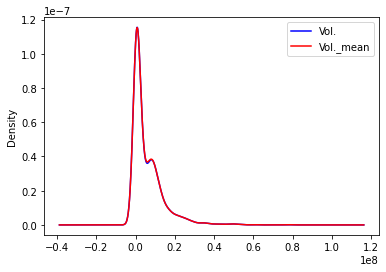

In [25]:
## To check how much impact these two techniques of missing values are having
plt.figure()
df['Vol.'].plot(kind = 'kde', color = 'blue', label = 'Vol.')
df['Vol._mean'].plot(kind = 'kde', color = 'red', label = 'Vol._mean')
plt.legend()
plt.show()

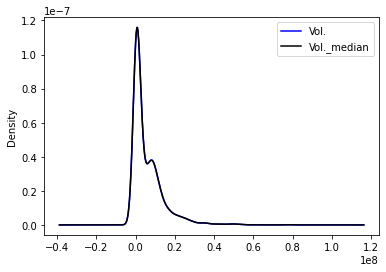

In [26]:
plt.figure()
df['Vol.'].plot(kind = 'kde', color = 'blue', label = 'Vol.')
df['Vol._median'].plot(kind = 'kde', color = 'black', label = 'Vol._median')
plt.legend()
plt.show()

#### As we can see, replacement by means and median in this case, is not affecting the distribution. Both the methods are feasible, I am going with median method.

In [27]:
df.drop(['Vol.'], axis = 1, inplace = True)
df.drop(['Vol._mean'], axis = 1, inplace = True)

In [28]:
df.rename(columns = {'Vol._median': 'Volume' }, inplace = True)

#### EXPLORATORY DATA ANALYSIS

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1890 entries, 0 to 1889
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     1890 non-null   float64
 1   Open      1890 non-null   float64
 2   High      1890 non-null   float64
 3   Low       1890 non-null   float64
 4   Change %  1890 non-null   float64
 5   Volume    1890 non-null   float64
dtypes: float64(6)
memory usage: 88.7 KB


In [30]:
df.describe()

,Price,Open,High,Low,Change %,Volume
count,1890.000000,1890.000000,1890.000000,1890.000000,1890.000000,1.890000e+03
mean,364.325894,362.103444,377.091714,346.397492,0.478704,5.875947e+06
std,508.675047,500.897669,524.569532,479.876352,5.719658,8.098083e+06
min,6.700000,6.680000,7.320000,5.860000,-44.550000,0.000000e+00
25%,114.617500,114.577500,119.125000,106.647500,-2.170000,5.369325e+05
50%,213.710000,213.175000,220.510000,206.435000,0.095000,1.990000e+06
75%,388.762500,388.245000,401.597500,378.755000,2.997500,9.020000e+06
max,4241.190000,4173.610000,4366.100000,4151.390000,29.510000,7.747000e+07


- In the above figure we can see that for every column, we have mean> median. i.e Data is right skewed.
- Each column contains outliers
- Further more, our data needs to normalized. 



<AxesSubplot:>

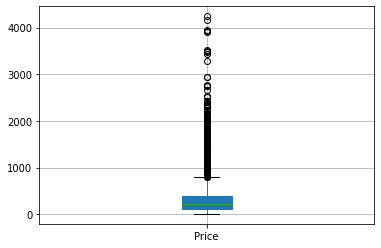

In [31]:
df.boxplot(column = 'Price', patch_artist = True)

<AxesSubplot:>

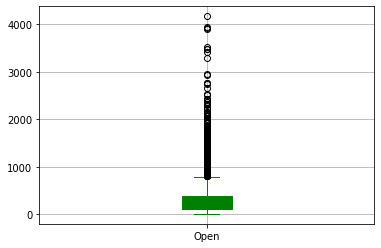

In [32]:
df.boxplot(column = 'Open', patch_artist = True, color = 'green')

<AxesSubplot:>

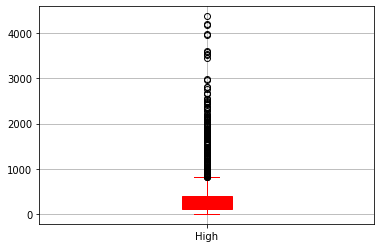

In [33]:
df.boxplot(column = 'High', patch_artist = True, color = 'red' )

<AxesSubplot:>

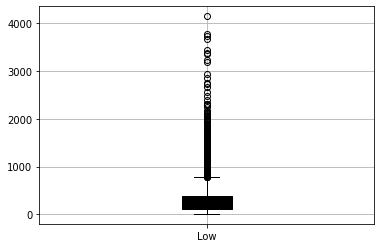

In [34]:
df.boxplot(column = 'Low', patch_artist = True, color = 'Black' )

<AxesSubplot:>

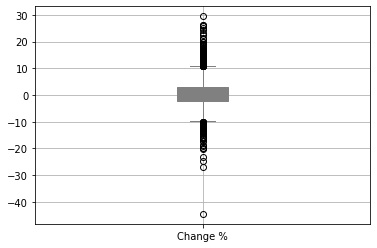

In [35]:
df.boxplot(column = 'Change %', patch_artist = True, color = 'Grey' )

<AxesSubplot:>

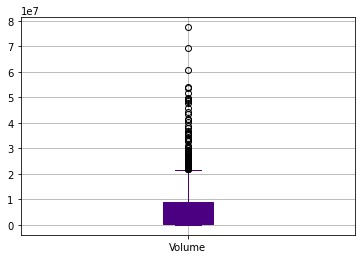

In [36]:
df.boxplot(column = 'Volume', patch_artist = True, color = 'Indigo' )

#### In this project, I am not removing outliers, as we have a small dataset, hence I will use algorithms that are not sensitive to outliers. 


C:\Users\a\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\a\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\a\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

<AxesSubplot:xlabel='Volume', ylabel='Density'>

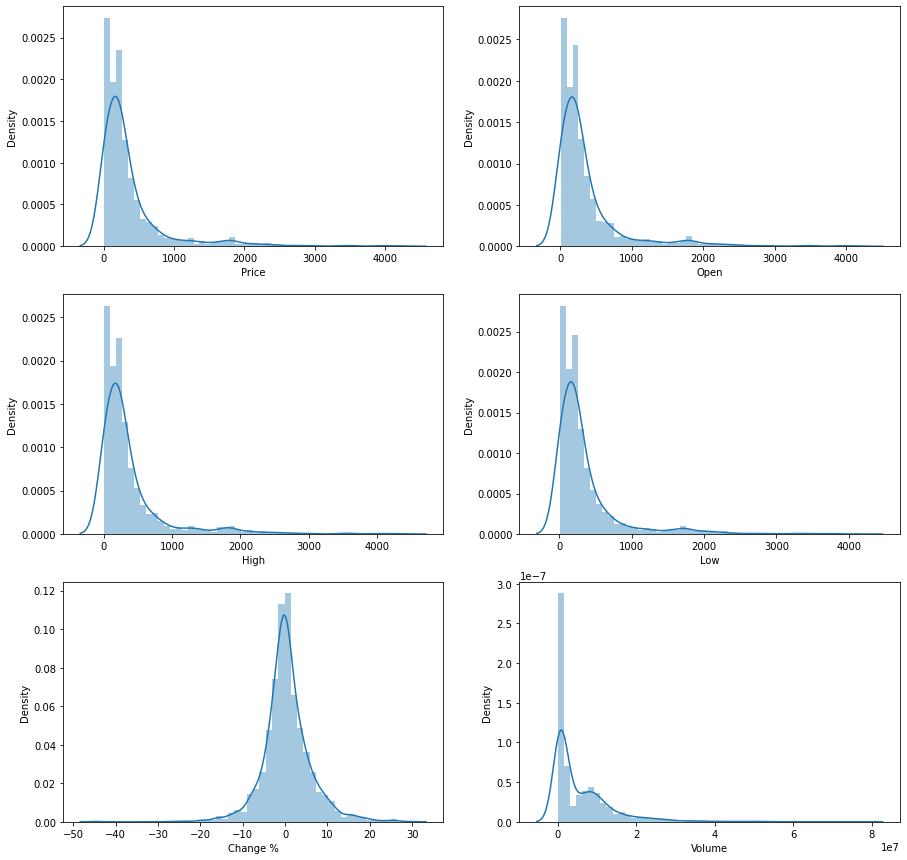

In [40]:
### Visualizing the distribution
fig,ax = plt.subplots(3,2, figsize=(15,15))
sns.distplot(df['Price'], ax = ax[0,0])
sns.distplot(df['Open'], ax = ax[0,1])
sns.distplot(df['High'], ax = ax[1,0])
sns.distplot(df['Low'], ax = ax[1,1])
sns.distplot(df['Change %'], ax = ax[2,0])
sns.distplot(df['Volume'], ax = ax[2,1])


- We can see from the above figure, that except 'Change %', column, every other column is right skewed. 
- As we are using an algorithm which is not sensitive to outliers, we will use an algorithm based on decision tree, which is called XGboost. In this algorithm, skewness of data does not matter. So, we will not use any type of scaling or normalization on the data. 

#### MODEL BUILDING

In [42]:
### Seperating Independent and dependent features
X = df.drop(['Price'], axis = 1)
Y = df['Price']

In [43]:
X.head()

,Open,High,Low,Change %,Volume
0,11.20,11.85,11.07,4.91,0.0
1,11.75,11.95,11.75,1.70,180.0
2,11.95,13.45,11.95,8.12,830.0
3,12.92,15.07,12.92,16.64,1300.0
4,15.07,15.07,11.40,-17.05,92180.0


In [44]:
Y.head()

0    11.75
1    11.95
2    12.92
3    15.07
4    12.50
Name: Price, dtype: float64

In [41]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [47]:
import matplotlib.pyplot as plt

from xgboost import XGBRegressor

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error



In [48]:
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }

    xgb_model = XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

In [49]:
hyperParameterTuning(X_train, Y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 3,
 'n_estimators': 500,
 'objective': 'reg:squarederror',
 'subsample': 0.5}

In [50]:
xgb_model = XGBRegressor(
        objective = 'reg:squarederror',
        colsample_bytree = 0.7,
        learning_rate = 0.1,
        max_depth = 5,
        min_child_weight = 3,
        n_estimators = 500,
        subsample = 0.5)
xgb_model.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [51]:
y_pred_xgb = xgb_model.predict(X_test)

In [52]:
y_pred_xgb

array([ 292.12787  , 1628.5278   ,  799.6215   ,  305.2083   ,
        446.8031   ,  384.42096  ,    8.419887 ,   12.681583 ,
        694.2247   ,  125.99837  ,   12.681583 ,   12.719954 ,
        329.1475   , 1540.8461   ,   10.827455 ,  246.63676  ,
         98.13413  ,   10.4671955,   10.503351 ,   13.343742 ,
        241.29948  ,   11.919499 , 1773.3746   ,  566.33105  ,
        107.9584   ,  201.63036  ,   11.565873 ,  185.90369  ,
        376.83627  ,  611.18774  , 1534.2258   ,   99.537964 ,
         11.299249 ,  183.83075  ,  136.32372  ,  547.995    ,
         10.705633 ,   13.792789 ,   88.88969  ,  381.18027  ,
        144.7994   ,  573.7047   ,  218.76819  ,  475.86     ,
         12.182445 ,    9.408239 , 1514.6925   , 1001.98315  ,
        172.9869   ,  169.63173  ,  230.60901  ,  185.64346  ,
        868.4652   ,  252.03413  ,  627.3726   ,  122.29033  ,
        372.848    ,   12.678839 ,   51.932262 ,  308.73666  ,
         10.41315  ,  189.05815  , 1791.2213   ,  244.3

In [54]:
mae_xgb = mean_absolute_error(Y_test, y_pred_xgb)
mae_xgb

5.192653773188841

In [58]:
## Accuracy
acc = xgb_model.score(X_test, Y_test)*100
print('Accuracy of XGboost model is: {}%'.format(acc))

Accuracy of XGboost model is: 99.90363497350447%


In [59]:
### Deployement
import pickle
pickle_out = open('xgb_model.pkl', 'wb')
pickle.dump(xgb_model, pickle_out)
pickle_out.close()